# Import libraries and ready data

In [233]:
import cv2
import matplotlib.pyplot as plt

In [234]:
config_file = 'data/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'data/frozen_inference_graph.pb'

In [235]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

# Find index

In [236]:
classLabels = [] #empty list of python
file = 'data/Labels.txt'

with open(file, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    print(classLabels.index('laptop'))

63


In [237]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'tree', 'bush', 'lake', 'mountain', 'water']


In [238]:
print(len(classLabels))

85


In [239]:
if 'lake' in classLabels:
    print('yes')
else:
    print("Does not exist")

yes


In [295]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5) # 255 / 2
model.setInputMean((127.5, 127.5, 127.5)) ##mobilenet input is [-1, 1]
model.setInputSwapRB(True) #set input as RB

< cv2.dnn.Model 000002CA12FABEF0>

# Read an image

In [296]:
img = cv2.imread('data/man-car.jpg')

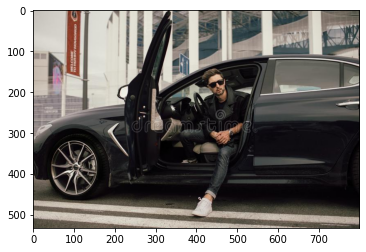

In [297]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [298]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [299]:
print(ClassIndex) # person & car labels

[1 3]


In [300]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2) # color blue of rectangle
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)

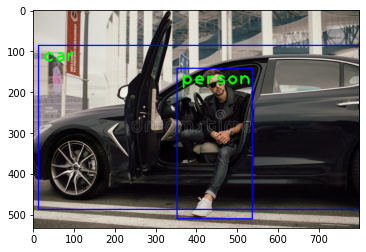

In [301]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Example 2

In [302]:
img_test = cv2.imread('data/dog.jpg')

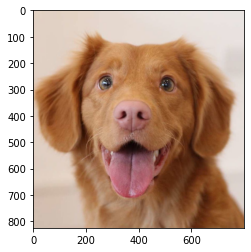

In [303]:
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))

In [304]:
ClassIndex, confidence, bbox = model.detect(img_test, confThreshold = 0.5)

In [305]:
print(ClassIndex) 

[18 32]


In [306]:
font_scale = 5
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img_test, boxes, (255, 0, 0), 2) # color blue of rectangle
    cv2.putText(img_test, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)

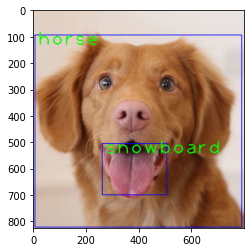

In [307]:
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))

# Video example

In [308]:
video = cv2.VideoCapture("data/walking.mp4")

# check if the video is opened correctly
if not video.isOpened():
    video = cv2.VideoCapture(0)
if not video.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = video.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <= 80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2) # color blue of rectangle
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)
                
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

[ 3 64  4  3  3  1  1  1  3]
[ 3  4 64  3  3  1  1  4  3  1]
[ 4  3 64  3  3  4  3  1  1]
[64  3  3  4  3  3  1  1]
[64  3  3  4  3  3]
[64  3  3  3  3  4  3 64]
[ 3 64  3  3  3  3  1]
[ 3 64  3  3  3  3  1  1]
[ 3 64  3  3  3]
[ 3 64  3  3  1  1  1  3]
[ 3 64  3  3  1  1]
[64  3  3  3  1  1  1  3]
[ 3 64  3  1  1  1  1  3]
[ 3 64  3  1  1  1]
[ 3 64  3  1  1  1]
[ 3 64  3  1]
[64  3  3  3  1  3]
[ 3  3 64  3  1  1  3]
[ 3  3 64  3  1  1  1  3]
[ 3 64  3  3  1  3  1  4  1]
[64  3  3  3  1  3  4]
[ 3  3  3  1 64  1  1  4  1]
[ 3  3  3  1  1  1  1 64  4]
[ 3  1  3  3 64  1  1  4  1]
[ 3  1  3  3 64  1  3  4  1]
[ 3  1  3  3 64  4  4  1]
[ 1  3  3 64  3  4  4  1  3]
[64  3  1  3  3  4  4]
[64  3  1  3  3  1]
[64  3  1  3  1  3  4  1  1]
[64  3  1  3  1  1  3  1]
[64  3  1  3  1  1  1  3]
[64  3  1  3  3  1  1  1  4]
[64  3  1  3  3  1  4  1  1]
[64  3  1  3  3  1  1  1]
[64  3  1  3  3  1  4  1  1  8]
[64  3  3  1  3  1  4  8]
[64  3  1  3  3  4  1]
[64  4  3  3  3  1  8 10]
[64  3  3  1 